In [314]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import patsy
from patsy import dmatrix

In [313]:
## Load the data into a DataFrame
data = pd.read_csv('projects/weekly-projects/project-03/datasets/Iowa_Liquor_Sales_reduced.csv')

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [322]:
data.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [376]:
#just deleted something from here on accident-think I fixed it. 
data['State Bottle Cost'] = data['State Bottle Cost'].str.replace('$', '').astype(float)

In [377]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '').astype(float)

In [378]:
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '').astype(float)

In [379]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19


In [305]:
print data.describe()

       Store Number  County Number      Category  Vendor Number   Item Number  \
count  2.709552e+06   2.698639e+06  2.708773e+06   2.709552e+06  2.709552e+06   
mean   3.589071e+03   5.726086e+01  1.043826e+06   2.563901e+02  4.601624e+04   
std    9.491083e+02   2.732565e+01  5.003493e+04   1.408757e+02  5.311268e+04   
min    2.106000e+03   1.000000e+00  1.011100e+06   1.000000e+01  1.460000e+02   
25%    2.604000e+03            NaN           NaN   1.150000e+02  2.682800e+04   
50%    3.721000e+03            NaN           NaN   2.600000e+02  3.817600e+04   
75%    4.382000e+03            NaN           NaN   3.800000e+02  6.460100e+04   
max    9.023000e+03   9.900000e+01  1.701100e+06   9.780000e+02  9.992750e+05   

       Bottle Volume (ml)  Bottles Sold  Volume Sold (Liters)  \
count        2.709552e+06  2.709552e+06          2.709552e+06   
mean         9.242111e+02  9.838390e+00          8.921504e+00   
std          5.464858e+02  2.349863e+01          2.824435e+01   
min       

In [284]:
#shows some missing data for this column
#can see if county number could work
data['County Number'].isnull().head(10)

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: County Number, dtype: bool

In [287]:
data['County'].isnull().value_counts()

False    2698639
True       10913
Name: County, dtype: int64

In [282]:
#there is some missing data in this column
#row 4 has no identifier for county
#this would need to be dropped from dataset
data['County'].isnull().head()

0    False
1    False
2    False
3    False
4     True
Name: County, dtype: bool

In [290]:
data['County'].count()

2698639

In [291]:
2698639 - 10913

2687726

In [297]:
10913 / 2698639.0

0.004043890272096416

In [286]:
#there are ~10,000 missing identifiers for county in this dataset
#accounts for 0.4% of our data. Dropping the nulls seems insignificant due to large dataset size
data['County'].isnull().value_counts()

False    2698639
True       10913
Name: County, dtype: int64

In [212]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [213]:
data.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2.709552e+06,2.698639e+06,2.708773e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06,2.709552e+06
mean,3.589071e+03,5.726086e+01,1.043826e+06,2.563901e+02,4.601624e+04,9.242111e+02,9.816209e+00,1.474012e+01,9.838390e+00,1.291191e+02,8.921504e+00,2.357017e+00
std,9.491083e+02,2.732565e+01,5.003493e+04,1.408757e+02,5.311268e+04,5.464858e+02,1.490656e+01,2.235953e+01,2.349863e+01,3.994615e+02,2.824435e+01,7.461356e+00
min,2.106000e+03,1.000000e+00,1.011100e+06,1.000000e+01,1.460000e+02,0.000000e+00,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,NaN,NaN,1.150000e+02,2.682800e+04,7.500000e+02,5.510000e+00,8.270000e+00,2.000000e+00,3.048000e+01,1.500000e+00,4.000000e-01
50%,3.721000e+03,NaN,NaN,2.600000e+02,3.817600e+04,7.500000e+02,8.070000e+00,1.230000e+01,6.000000e+00,7.056000e+01,5.250000e+00,1.390000e+00
75%,4.382000e+03,NaN,NaN,3.800000e+02,6.460100e+04,1.000000e+03,1.196000e+01,1.794000e+01,1.200000e+01,1.350000e+02,1.050000e+01,2.770000e+00
max,9.023000e+03,9.900000e+01,1.701100e+06,9.780000e+02,9.992750e+05,2.250000e+05,6.468000e+03,9.702000e+03,3.960000e+03,1.063260e+05,3.960000e+03,1.046120e+03


In [214]:
data["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [215]:
data['Date'].head()

0   2016-03-31
1   2016-03-31
2   2016-03-31
3   2016-03-31
4   2016-03-31
Name: Date, dtype: datetime64[ns]

In [298]:
data['Date'].count()

2709552

In [217]:
data['City'].describe()

count        2709552
unique           386
top       DES MOINES
freq          237791
Name: City, dtype: object

In [218]:
#tells you if there are missing data in column
data['Store Number'].isnull().any()

False

In [219]:
#tells you if there are missing data in column
data['Sale (Dollars)'].isnull().any()

False

In [220]:
#tells you if there are missing data in column
data['Date'].isnull().any()

False

In [221]:
#Dont need to do this because I have complete data for columns I want to look at
#on second look, I am missing some data...
#data_drop = data.dropna()

In [222]:
data.count()

Date                     2709552
Store Number             2709552
City                     2709552
Zip Code                 2709552
County Number            2698639
County                   2698639
Category                 2708773
Category Name            2703443
Vendor Number            2709552
Item Number              2709552
Item Description         2709552
Bottle Volume (ml)       2709552
State Bottle Cost        2709552
State Bottle Retail      2709552
Bottles Sold             2709552
Sale (Dollars)           2709552
Volume Sold (Liters)     2709552
Volume Sold (Gallons)    2709552
dtype: int64

These columns contain missing data:
County Number            2698639
County                   2698639
Category                 2708773
Category Name            2703443

In [223]:
data.shape

(2709552, 18)

In [224]:
#
2709552 - 2692602

16950

In [225]:
data.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [226]:
#just messing around
total_profit = data['State Bottle Retail'] - data['State Bottle Cost']
total_profit.head()

0    5.00
1    6.25
2    2.99
3    1.12
4    6.25
dtype: float64

In [227]:
data['Store Number'].value_counts().sum()

2709552

In [228]:
#set will filter out duplicates
#shows how many stores I am dealing with
len(set(data['Store Number']))

1403

In [229]:
#just messing around
each_store = pd.DataFrame(data['Store Number'].value_counts())
each_store = each_store.reset_index()
each_store.columns = ['Store ID', 'Sale (Dollars)']
each_store.head()

,Store ID,Sale (Dollars)
0,2633,24336
1,4829,22851
2,2512,17962
3,2572,17085
4,2515,16167


In [230]:
#shows how many stores I have without repeats
len(each_store)

1403

In [231]:
#this table does not distinguish between year 2015 and 2016, it is for both years
both_years = pd.pivot_table(each_store, index=['Store ID'], values=['Sale (Dollars)'])
both_years.head()

,Sale (Dollars)
Store ID,
2106,6334
2113,1754
2130,4988
2152,1742
2178,3262


In [375]:
#allows me to separate by 2015 and 2016
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
#this worked the first time I ran it, ran it again and now its broken

AttributeError: Can only use .dt accessor with datetimelike values

In [234]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Year', u'Month'],
      dtype='object')

In [235]:
#make sure not to add any columns that have null values and are not int

In [236]:
#got ahead of myself and had to go back to add date column before I separate by year
#need to go back into these two year tables and add more variables so I can test
#separated total sales per store by year
year_2015 = pd.pivot_table(data[(data['Year'] == 2015)], 
                           values=['Sale (Dollars)','Volume Sold (Liters)',
                                   'Volume Sold (Gallons)', 'State Bottle Cost',
                                   'Bottle Volume (ml)', 'State Bottle Retail'], 
                           index='Store Number', aggfunc=np.sum)
year_2015.reset_index(inplace=True)
year_2015.head()

,Store Number,Bottle Volume (ml),Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,4643675,1434369.85,55183.96,82829.51,24832.44,93986.47
1,2113,1313875,85763.42,14469.12,21725.74,1717.17,6500.83
2,2130,3647275,1108184.99,40580.91,60908.96,17321.29,65562.88
3,2152,1513250,72080.36,12311.88,18507.48,1628.42,6164.92
4,2178,2739775,277987.96,26665.46,40070.07,5737.98,21719.49


In [237]:
#need to show only jan-mar per year
#and then add the sale column back into the above pivot table
jan_march_2015 = pd.pivot_table(data[((data['Year'] == 2015) & (data['Month'] <= 3))], 
                                   values=['Bottle Volume (ml)', 'State Bottle Cost (Dollars)', 
                                           'State Bottle Retail (Dollars)', 
                                           'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 
                                           'Volume Sold (Gallons)'], 
                                   index=['Store Number'], aggfunc=np.sum)
jan_march_2015.reset_index(inplace=True)
jan_march_2015.head()

,Store Number,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Volume Sold (Liters)
0,2106,1085925,23316,337166.53,5764.04,21815.55
1,2113,319625,1618,22351.86,423.73,1604.08
2,2130,869575,17707,277764.46,4273.60,16176.37
3,2152,355500,1375,16805.11,373.65,1414.59
4,2178,556200,4279,54411.42,1156.12,4376.38


In [238]:
#added Jan-Mar column as required
year_2015['Jan-March Sales (Dollars)'] = jan_march_2015['Sale (Dollars)']
year_2015.head()

,Store Number,Bottle Volume (ml),Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Jan-March Sales (Dollars)
0,2106,4643675,1434369.85,55183.96,82829.51,24832.44,93986.47,337166.53
1,2113,1313875,85763.42,14469.12,21725.74,1717.17,6500.83,22351.86
2,2130,3647275,1108184.99,40580.91,60908.96,17321.29,65562.88,277764.46
3,2152,1513250,72080.36,12311.88,18507.48,1628.42,6164.92,16805.11
4,2178,2739775,277987.96,26665.46,40070.07,5737.98,21719.49,54411.42


In [239]:
#need to get rid of null values for 'State Bottle Cost'
year_2015.dropna(inplace=True)

In [243]:
#this ran true so I went back up and dropped the nulls
#dont want to use stores that didnt sell for 3 months
#it would mess up my predictions for a years forecast
X.isnull().any()

State Bottle Cost            False
Jan-March Sales (Dollars)    False
dtype: bool

In [306]:
print year_2015.describe()

       Store Number  Bottle Volume (ml)  Sale (Dollars)  State Bottle Cost  \
count   1283.000000        1.283000e+03    1.283000e+03        1283.000000   
mean    4162.644583        1.536273e+06    2.162568e+05       16307.065963   
std      775.243033        2.114692e+06    5.178018e+05       24951.102789   
min     2106.000000        1.062500e+04    8.271300e+02         121.770000   
25%     3809.500000        2.782000e+05    3.359112e+04        2813.165000   
50%     4384.000000        7.561250e+05    7.504576e+04        7506.390000   
75%     4747.500000        1.683488e+06    1.997387e+05       17421.100000   
max     5114.000000        1.791535e+07    9.839393e+06      239277.900000   

       State Bottle Retail  Volume Sold (Gallons)  Volume Sold (Liters)  \
count          1283.000000            1283.000000           1283.000000   
mean          24489.853328            3945.143967          14932.697592   
std           37466.891019            8481.564944          32103.857303 

In [299]:
#follow this to begin modeling
# Fit a line
X= year_2015[['State Bottle Cost', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

In [271]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 
#to show some stuff
#for every one unit increase in X, y increases by 13.2835 (coefficient variable)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1342.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          4.91e-315
Time:                        14:34:57   Log-Likelihood:                -18079.
No. Observations:                1283   AIC:                         3.616e+04
Df Residuals:                    1281   BIC:                         3.617e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
State Bottle Cost            13.2835      0.372     35.741      0.000        12.554    14.013
Jan-March Sales (Dollars)     0.7594      0.085      8.934      0.000         0.593     0.926
==============================================================================
Omnibus:                     2022.173   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168006.762
Skew:                           9.563   Prob(JB):                         0.00
Kurtosis:                     149.571   Cond. No.                         5.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 r^2: 0.99529399164


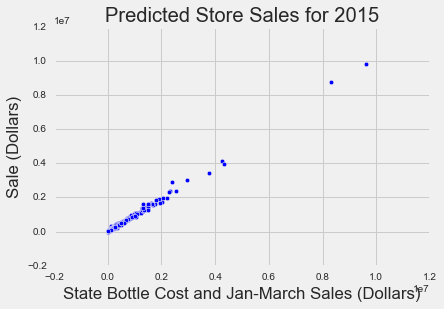

In [369]:
# Plot the data and the best fit line
# The line / model
plt.style.use('fivethirtyeight')
plt.scatter(predictions, y)
plt.title('Predicted Store Sales for 2015')
plt.ylabel("Sale (Dollars)")
plt.xlabel("State Bottle Cost and Jan-March Sales (Dollars)");

# Statsmodels makes it easy to get the score
print "r^2:", model.rsquared
#this is from patsy, not sure if I can make it work with this
#print "MSE:", year_2015.mse_model

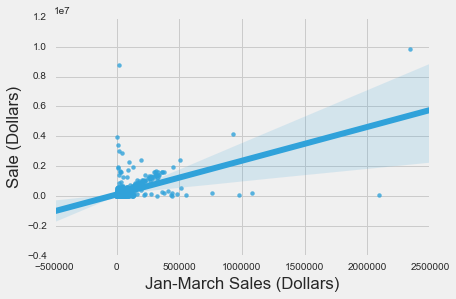

In [266]:
#another visualization
sns.regplot(x='Jan-March Sales (Dollars)', y='Sale (Dollars)', data=year_2015);

In [323]:
X= year_2015[['Store Number', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

In [324]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     382.8
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          4.67e-131
Time:                        18:58:03   Log-Likelihood:                -18504.
No. Observations:                1283   AIC:                         3.701e+04
Df Residuals:                    1281   BIC:                         3.702e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 19.3551      3.080      6.283      0.000        13.312    25.398
Jan-March Sales (Dollars)     2.3694      0.100     23.670      0.000         2.173     2.566
==============================================================================
Omnibus:                     1696.987   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1037622.063
Skew:                           6.608   Prob(JB):                         0.00
Kurtosis:                     141.691   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
X= year_2015[['Bottle Volume (ml)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          9.81e-282
Time:                        18:59:47   Log-Likelihood:                -18156.
No. Observations:                1283   AIC:                         3.632e+04
Df Residuals:                    1281   BIC:                         3.633e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)            0.1411      0.004     31.445      0.000         0.132     0.150
Jan-March Sales (Dollars)     0.8913      0.090      9.903      0.000         0.715     1.068
==============================================================================
Omnibus:                     2117.698   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1535005.520
Skew:                          10.443   Prob(JB):                         0.00
Kurtosis:                     171.160   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
#notice the perfect R2 score. This is a throw out.
#it shows that totals sales predicts total sales
X= year_2015[['Sale (Dollars)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.093e+34
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:00:34   Log-Likelihood:                 27746.
No. Observations:                1283   AIC:                        -5.549e+04
Df Residuals:                    1281   BIC:                        -5.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Sale (Dollars)                1.0000   6.09e-18   1.64e+17      0.000         1.000     1.000
Jan-March Sales (Dollars) -4.163e-16   2.62e-17    -15.891      0.000     -4.68e-16 -3.65e-16
==============================================================================
Omnibus:                     1792.848   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           955118.236
Skew:                          -7.459   Prob(JB):                         0.00
Kurtosis:                     135.831   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
X= year_2015[['State Bottle Retail', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):          6.27e-315
Time:                        19:01:58   Log-Likelihood:                -18079.
No. Observations:                1283   AIC:                         3.616e+04
Df Residuals:                    1281   BIC:                         3.617e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
State Bottle Retail           8.8442      0.248     35.727      0.000         8.359     9.330
Jan-March Sales (Dollars)     0.7597      0.085      8.936      0.000         0.593     0.927
==============================================================================
Omnibus:                     2022.442   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1168912.795
Skew:                           9.566   Prob(JB):                         0.00
Kurtosis:                     149.628   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
#this shows a good R2
X= year_2015[['Volume Sold (Gallons)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.023e+04
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:02:56   Log-Likelihood:                -15998.
No. Observations:                1283   AIC:                         3.200e+04
Df Residuals:                    1281   BIC:                         3.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Volume Sold (Gallons)        59.8635      0.236    253.694      0.000        59.401    60.326
Jan-March Sales (Dollars)    -0.0303      0.017     -1.791      0.074        -0.064     0.003
==============================================================================
Omnibus:                     1210.649   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160628.501
Skew:                           3.916   Prob(JB):                         0.00
Kurtosis:                      57.253   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
#same R2 as 'Volume Sold (Gallons)', could be same measure just different units
X= year_2015[['Volume Sold (Liters)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.020e+04
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:03:54   Log-Likelihood:                -15998.
No. Observations:                1283   AIC:                         3.200e+04
Df Residuals:                    1281   BIC:                         3.201e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Volume Sold (Liters)         15.8153      0.062    253.617      0.000        15.693    15.938
Jan-March Sales (Dollars)    -0.0303      0.017     -1.788      0.074        -0.064     0.003
==============================================================================
Omnibus:                     1210.159   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160425.712
Skew:                           3.913   Prob(JB):                         0.00
Kurtosis:                      57.219   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
year_2015.columns

Index([u'Store Number', u'Bottle Volume (ml)', u'Sale (Dollars)',
       u'State Bottle Cost', u'State Bottle Retail', u'Volume Sold (Gallons)',
       u'Volume Sold (Liters)', u'Jan-March Sales (Dollars)'],
      dtype='object')

In [331]:
#again, this is invalid because 'Sale (Dollars)' perfectly predicts itself
X= year_2015[['Store Number', 'Bottle Volume (ml)', 'Sale (Dollars)',
        'State Bottle Cost',  'State Bottle Retail', 'Volume Sold (Gallons)',
        'Volume Sold (Liters)',  'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.406e+27
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:07:23   Log-Likelihood:                 18388.
No. Observations:                1283   AIC:                        -3.676e+04
Df Residuals:                    1275   BIC:                        -3.672e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number               -2.22e-15   1.16e-12     -0.002      0.998     -2.27e-12  2.27e-12
Bottle Volume (ml)         1.318e-16      2e-14      0.007      0.995     -3.91e-14  3.94e-14
Sale (Dollars)                1.0000   1.08e-13    9.3e+12      0.000         1.000     1.000
State Bottle Cost          3.638e-12   5.52e-10      0.007      0.995     -1.08e-09  1.09e-09
State Bottle Retail       -2.046e-12   3.68e-10     -0.006      0.996     -7.23e-10  7.19e-10
Volume Sold (Gallons)      3.638e-12   3.53e-09      0.001      0.999     -6.92e-09  6.93e-09
Volume Sold (Liters)       2.728e-12   9.32e-10      0.003      0.998     -1.83e-09  1.83e-09
Jan-March Sales (Dollars) -3.331e-16   4.02e-14     -0.008      0.993     -7.92e-14  7.86e-14
==============================================================================
Omnibus:                     1862.262   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           664173.804
Skew:                          -8.268   Prob(JB):                         0.00
Kurtosis:                     113.230   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Volume Sold (Gallons)',
              'Volume Sold (Liters)',  'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.040e+04
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:08:44   Log-Likelihood:                -15336.
No. Observations:                1283   AIC:                         3.069e+04
Df Residuals:                    1276   BIC:                         3.072e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                  0.0806      0.301      0.267      0.789        -0.511     0.672
Bottle Volume (ml)           -0.1105      0.004    -26.413      0.000        -0.119    -0.102
State Bottle Cost          1069.5976    140.409      7.618      0.000       794.141  1345.055
State Bottle Retail        -706.1690     93.641     -7.541      0.000      -889.877  -522.462
Volume Sold (Gallons)      1041.8143    918.334      1.134      0.257      -759.796  2843.425
Volume Sold (Liters)       -259.4026    242.604     -1.069      0.285      -735.350   216.544
Jan-March Sales (Dollars)     0.0302      0.010      2.895      0.004         0.010     0.051
==============================================================================
Omnibus:                      662.609   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178122.010
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                      60.675   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [333]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Volume Sold (Gallons)',
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.713e+04
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:10:18   Log-Likelihood:                -15337.
No. Observations:                1283   AIC:                         3.069e+04
Df Residuals:                    1277   BIC:                         3.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                  0.1208      0.299      0.404      0.686        -0.466     0.707
Bottle Volume (ml)           -0.1118      0.004    -27.965      0.000        -0.120    -0.104
State Bottle Cost          1069.6506    140.416      7.618      0.000       794.178  1345.123
State Bottle Retail        -706.1180     93.646     -7.540      0.000      -889.836  -522.400
Volume Sold (Gallons)        59.8930      0.222    270.051      0.000        59.458    60.328
Jan-March Sales (Dollars)     0.0301      0.010      2.888      0.004         0.010     0.051
==============================================================================
Omnibus:                      657.308   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178337.429
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                      60.712   Cond. No.                     4.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'State Bottle Retail', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     722.8
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:10:52   Log-Likelihood:                -17943.
No. Observations:                1283   AIC:                         3.590e+04
Df Residuals:                    1278   BIC:                         3.592e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 -6.3541      2.271     -2.797      0.005       -10.810    -1.898
Bottle Volume (ml)            0.0283      0.030      0.937      0.349        -0.031     0.088
State Bottle Cost          1.343e+04   1011.488     13.281      0.000      1.14e+04  1.54e+04
State Bottle Retail       -8938.2464    674.712    -13.248      0.000     -1.03e+04 -7614.582
Jan-March Sales (Dollars)     0.7764      0.077     10.127      0.000         0.626     0.927
==============================================================================
Omnibus:                     1508.183   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           302065.333
Skew:                           5.661   Prob(JB):                         0.00
Kurtosis:                      77.312   Cond. No.                     3.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
X= year_2015[['Store Number', 'Bottle Volume (ml)','State Bottle Cost',  
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     756.5
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:13:06   Log-Likelihood:                -18026.
No. Observations:                1283   AIC:                         3.606e+04
Df Residuals:                    1279   BIC:                         3.608e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Store Number                 -1.7654      2.393     -0.738      0.461        -6.460     2.929
Bottle Volume (ml)           -0.2358      0.024     -9.744      0.000        -0.283    -0.188
State Bottle Cost            33.7928      2.084     16.213      0.000        29.704    37.882
Jan-March Sales (Dollars)     0.7861      0.082      9.619      0.000         0.626     0.946
==============================================================================
Omnibus:                     1697.536   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536138.120
Skew:                           6.902   Prob(JB):                         0.00
Kurtosis:                     102.189   Cond. No.                         779.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
#deleted 'Store Number' this round. Seems to have no effect...
X= year_2015[['Bottle Volume (ml)','State Bottle Cost',  
              'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:13:54   Log-Likelihood:                -18026.
No. Observations:                1283   AIC:                         3.606e+04
Df Residuals:                    1280   BIC:                         3.607e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)           -0.2416      0.023    -10.546      0.000        -0.286    -0.197
State Bottle Cost            34.1875      2.014     16.975      0.000        30.236    38.139
Jan-March Sales (Dollars)     0.7829      0.082      9.595      0.000         0.623     0.943
==============================================================================
Omnibus:                     1704.476   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542524.628
Skew:                           6.955   Prob(JB):                         0.00
Kurtosis:                     102.775   Cond. No.                         616.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
#this looks like a good combo to me!
#but is it too good...
X= year_2015[['Bottle Volume (ml)','State Bottle Cost',  
              'Volume Sold (Gallons)', 'Jan-March Sales (Dollars)']]
y= year_2015["Sale (Dollars)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.763e+04
Date:                Sat, 15 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:17:15   Log-Likelihood:                -15366.
No. Observations:                1283   AIC:                         3.074e+04
Df Residuals:                    1279   BIC:                         3.076e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Bottle Volume (ml)           -0.1301      0.003    -44.716      0.000        -0.136    -0.124
State Bottle Cost            10.7671      0.267     40.359      0.000        10.244    11.290
Volume Sold (Gallons)        60.4278      0.214    281.961      0.000        60.007    60.848
Jan-March Sales (Dollars)     0.0251      0.011      2.362      0.018         0.004     0.046
==============================================================================
Omnibus:                      576.395   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162674.542
Skew:                           0.830   Prob(JB):                         0.00
Kurtosis:                      58.139   Cond. No.                         689.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

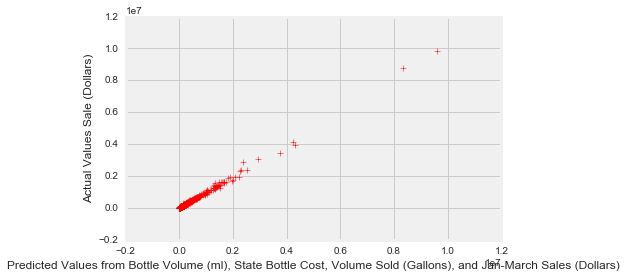

MSE: 1.00457568873e+14


In [349]:
#Let's plot the predictions versus the actual values.
#shows mean standard error
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Bottle Volume (ml), State Bottle Cost, Volume Sold (Gallons), and Jan-March Sales (Dollars)")
plt.ylabel("Actual Values Sale (Dollars)")
plt.show()
print "MSE:", model.mse_model
#is this model to 'fit'?

In [367]:
#can I apply this loop for my data?
r2_list = {}
for first_pair in year_2015.columns:
    if first_pair != second_pair
    y= year_2015['Sale (Dollars)']
    X= year_2015[[first_pair, second_pair]]
    model = sm.OLS(y,X).fit()
    r2_list['%s_by_%s' % (first_pair, second_pair)] = model.rsquared
print len(r2_list)
r2_list

maximum = max(r2_list, key=r2_list.get)  
print(maximum, r2_list[maximum])

minimum = min(r2_list, key=r2_list.get)  
print(minimum, r2_list[minimum])

NameError: name 'second_pair' is not defined

In [262]:
#sets up various combonations of variables to be ran through regressions
pair_list = []
for first in range(len(year_2015.columns)):
    for second in range(len(year_2015.columns)):
        if first > second:
            pair_list.append([year_2015.columns[first], year_2015.columns[second]])

In [264]:
#trying to loop my pair list through linear regression formula
#here are all the pairs I want to run through my regression model 
#show r^2 for each pair
pair_list

[['Bottle Volume (ml)', 'Store Number'],
 ['Sale (Dollars)', 'Store Number'],
 ['Sale (Dollars)', 'Bottle Volume (ml)'],
 ['State Bottle Cost', 'Store Number'],
 ['State Bottle Cost', 'Bottle Volume (ml)'],
 ['State Bottle Cost', 'Sale (Dollars)'],
 ['State Bottle Retail', 'Store Number'],
 ['State Bottle Retail', 'Bottle Volume (ml)'],
 ['State Bottle Retail', 'Sale (Dollars)'],
 ['State Bottle Retail', 'State Bottle Cost'],
 ['Volume Sold (Gallons)', 'Store Number'],
 ['Volume Sold (Gallons)', 'Bottle Volume (ml)'],
 ['Volume Sold (Gallons)', 'Sale (Dollars)'],
 ['Volume Sold (Gallons)', 'State Bottle Cost'],
 ['Volume Sold (Gallons)', 'State Bottle Retail'],
 ['Volume Sold (Liters)', 'Store Number'],
 ['Volume Sold (Liters)', 'Bottle Volume (ml)'],
 ['Volume Sold (Liters)', 'Sale (Dollars)'],
 ['Volume Sold (Liters)', 'State Bottle Cost'],
 ['Volume Sold (Liters)', 'State Bottle Retail'],
 ['Volume Sold (Liters)', 'Volume Sold (Gallons)'],
 ['Jan-March Sales (Dollars)', 'Store Numbe

In [312]:
#so I will have 28 regressions to compare
len(pair_list)

28

In [362]:
for i in pair_list:
    y = year_2015['Sale (Dollars)']
    X = year_2015[pair_list[i]]
    
    model = sm.OLS(y,X).fit()

TypeError: list indices must be integers, not list

So, I want to pass each pair through my r^2 function to show the best score for each match up of variables.
I also want to keep my _y-variable_ to be 'Sales (Dollars)' and one of my X's 'Jan-Mar Sales'. 
May need to rewrite loop to account for those two constants above...

r2_list = {}
for first_pair in year_2015 in df.columns:
    if first_pair != second_pair
    y= df['Sale (Dollars)']
    X= df[[first_pair, second_pair, 'Jan-March Sales (Dollars)']]
    model = sm.OLS(y,X).fit()
    r2_list['%s_by_%s' % (first_pair)
            get the rest from codealong notes

In [360]:
r2_list = {}
for first_pair in year_2015.columns:
    if first_pair != second_pair
    y= year_2015['Sale (Dollars)']
    X= year_2015[[first_pair, second_pair, 'Jan-March Sales (Dollars)']]
    model = sm.OLS(y,X).fit()
    r2_list['%s_by_%s' % (first_pair)
            print r2_list

SyntaxError: invalid syntax (<ipython-input-360-b14a2f56856b>, line 3)

Working in patsy

In [ ]:
#need to group all columns to be used as X variables to feed patsy my for loop


In [310]:
# Put the target (total sales -- 'Sale (Dollars)') in another DataFrame
targets = pd.DataFrame(data.target, columns=["Sale (Dollars)"])

AttributeError: 'DataFrame' object has no attribute 'target'

In [339]:
#this way seems to work compared to above
targets = year_2015['Sale (Dollars)']

In [353]:
y, X = patsy.dmatrices('Sale (Dollars) ~  Bottle Volume (ml) + Jan-March Sales (Dollars)', data=year_2015)

SyntaxError: invalid syntax (<unknown>, line 1)

In [342]:
targets.describe()

count    1.283000e+03
mean     2.162568e+05
std      5.178018e+05
min      8.271300e+02
25%      3.359112e+04
50%      7.504576e+04
75%      1.997387e+05
max      9.839393e+06
Name: Sale (Dollars), dtype: float64

In [301]:
# First let's add the targets to our data frame
year_2015["Sale (Dollars)"] = targets["Sale (Dollars)"]
year_2015.head()

NameError: name 'targets' is not defined

In [ ]:
#the loop in patsy that shows multiple graphs and MSE's for dataframe
l = list(data.feature_names)
l2 = []
for i in range(0, len(l)):
   for j in range(0, len(l)):
       if i > j:
           l2.append(str(l[j])+" + "+str(l[i]))
for i in range(0, len(l2)):
   y, x = patsy.dmatrices("MEDV ~ "+l2[i], data=df)
   model = sm.OLS(y, x).fit()
   predictions = model.predict(x)
   model.summary()
   plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
   plt.xlabel("Predicted Values from " + l2[i])
   plt.ylabel("Actual Values MEDV")
   plt.show()
   print "MSE:", model.mse_model


#mirroring the above code to fit my dataframe
l = list(data.feature_names)
l2 = []
for i in range(0, len(l)):
   for j in range(0, len(l)):
       if i > j:
           l2.append(str(l[j])+" + "+str(l[i]))
for i in range(0, len(l2)):
   y, x = patsy.dmatrices("Sale (Dollars)' ~ "+l2[i], data=year_2015)
   model = sm.OLS(y, x).fit()
   predictions = model.predict(x)
   model.summary()
   plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
   plt.xlabel("Predicted Values from " + l2[i])
   plt.ylabel("Actual Values Sale (Dollars)")
   plt.show()
   print "MSE:", model.mse_model

In [ ]:
#may want to plot a histogram showing the r2 scores set: y axis (0, 1), x will be each regression 

In [171]:
#THE START OF 2016 DATA
year_2016 = pd.pivot_table(data[(data['Year'] == 2016)], 
                           values=['Sale (Dollars)','Volume Sold (Liters)',
                                   'Volume Sold (Gallons)', 'State Bottle Cost',
                                   'Bottle Volume (ml)', 'State Bottle Retail'], 
                           index='Store Number', aggfunc=np.sum)
year_2016.reset_index(inplace=True)
year_2016.head()

,Store Number,Bottle Volume (ml),Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters)
0,2106,1126825,337804.05,12874.66,19318.38,5886.01,22277.95
1,2113,370750,21736.63,4181.02,6274.43,424.70,1608.07
2,2130,976675,306942.27,10555.70,15837.75,4801.01,18172.75
3,2152,319125,13752.24,2916.71,4381.51,301.97,1143.52
4,2178,618775,58939.90,6179.10,9276.85,1216.93,4606.64


In [374]:
#need to show only jan-mar per year
#and then add the sale column back into the above pivot table
jan_march_2016 = pd.pivot_table(data[((data['Year'] == 2016) & (data['Month'] <= 3))], 
                                   values=['Bottle Volume (ml)', 'State Bottle Cost (Dollars)', 
                                           'State Bottle Retail (Dollars)', 
                                           'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 
                                           'Volume Sold (Gallons)'], 
                                   index='Store Number', aggfunc=np.sum)
jan_march_2016.reset_index(inplace=True)
jan_march_2016.head()

KeyError: 'Year'

In [370]:
#added Jan-Mar column as required
year_2016['Jan-March Sales (Dollars)'] = jan_march_2016['Sale (Dollars)']
year_2016.head()

NameError: name 'jan_march_2016' is not defined